In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_snyk import create_df

In [2]:
df= create_df()
print(df)

      VulnerabilityID                       Package            Status  \
0      CVE-2023-39616                    aom3.6.0-1       minor issue   
1       CVE-2023-6879                    aom3.6.0-1       minor issue   
2      CVE-2023-39616                    aom3.6.0-1       minor issue   
3       CVE-2023-6879                    aom3.6.0-1       minor issue   
4       CVE-2011-3374                      apt2.6.1       unimportant   
...               ...                           ...               ...   
15878   CVE-2022-0563    util-linux2.38.1-5+deb12u1       unimportant   
15879   CVE-2022-0563  util-linux1:2.38.1-5+deb12u1       unimportant   
15880   CVE-2022-0563    util-linux2.38.1-5+deb12u1       unimportant   
15881  CVE-2021-31879               wget1.21.3-1+b2       minor issue   
15882  CVE-2023-45853           zlib1:1.2.13.dfsg-1  not yet assigned   

       Severity Container  
0          high     nginx  
1      critical     nginx  
2          high     nginx  
3      crit

<Axes: >

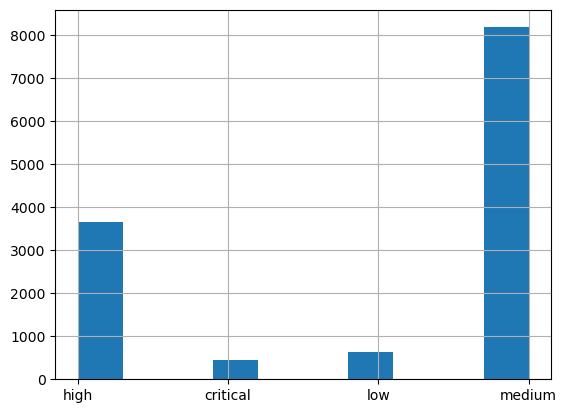

In [4]:
df['Severity'].hist()

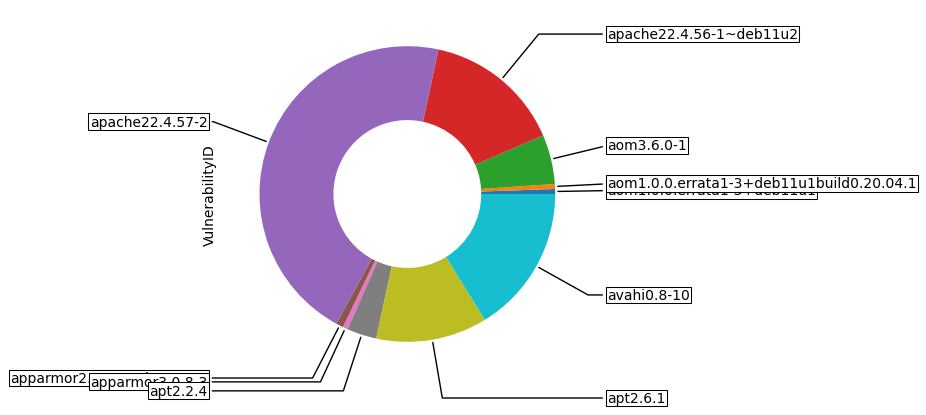

In [5]:
import numpy as np
import random
df_plot = df.groupby(['Package']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [6]:
containers = df['Container'].unique()

In [8]:
len(df.loc[df['Severity'] == "high"])

3664

In [10]:
len(df.loc[df['Container'] == "ruby"])

1129

In [12]:
dfa = df.loc[df['Container'] == "ruby"]
len(dfa.loc[dfa['Severity'] == "critical"])

45

In [12]:
df_aff = df.loc[df['Container'].isin(["almalinux", "eggdrop", "teamspeak", "nats", "busybox", "photon", "sl", "traefik"])]
print(df_aff)

      VulnerabilityID              Package Status Severity  Container
2487    CVE-2024-2511      openssl3.1.4-r5   None     None    traefik
2488    CVE-2024-2511      openssl3.1.4-r5   None     None    traefik
2489    CVE-2024-2511      openssl3.1.4-r5   None     None    traefik
2490    CVE-2024-2511      openssl3.1.4-r5   None     None    traefik
2491    CVE-2024-2511      openssl3.1.4-r5   None     None    traefik
...               ...                  ...    ...      ...        ...
15569   CVE-2023-6129      openssl3.1.4-r1   None   medium  teamspeak
15570   CVE-2023-6237      openssl3.1.4-r1   None     None  teamspeak
15571   CVE-2024-0727      openssl3.1.4-r1   None   medium  teamspeak
15572   CVE-2024-2511      openssl3.1.4-r1   None     None  teamspeak
15573   CVE-2024-0985  postgresql1515.5-r0   None     high  teamspeak

[80 rows x 5 columns]


In [13]:
print(df_aff.Status.unique())
print(df_aff.loc[df_aff['Status'].isin(["medium"])])

[None 'Moderate']
Empty DataFrame
Columns: [VulnerabilityID, Package, Status, Severity, Container]
Index: []


In [3]:
df = df[~df['VulnerabilityID'].str.contains('CVE', na=False)]
print(df)
df = df[~df['VulnerabilityID'].str.contains('TEMP', na=False)]
print(df)

Empty DataFrame
Columns: [VulnerabilityID, Package, Status, Severity, Container]
Index: []
Empty DataFrame
Columns: [VulnerabilityID, Package, Status, Severity, Container]
Index: []
